# Lab for answering question A
Responsible: Birgit

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
transformed_df_serial_path = "../data/data_transformed.pickle"

with open(transformed_df_serial_path, "rb") as file:
    df: pd.DataFrame = pickle.load(file)

assert isinstance(df, pd.DataFrame),f"The serialized object in {transformed_df_serial_path} is not a pandas dataframe!"
assert len(df)!=0, "The serialized dataframe contains no data!"

In [3]:
df

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Country,ISO,Region,Continent,Start_Year,Total_Deaths,No_Affected
0,Natural,Climatological,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,11000,<NA>
1,Natural,Climatological,Drought,India,IND,Southern Asia,Asia,1900,1250000,<NA>
2,Natural,Geophysical,Earthquake,Guatemala,GTM,Central America,Americas,1902,2000,<NA>
3,Natural,Geophysical,Volcanic activity,Guatemala,GTM,Central America,Americas,1902,1000,<NA>
4,Natural,Geophysical,Volcanic activity,Guatemala,GTM,Central America,Americas,1902,6000,<NA>
...,...,...,...,...,...,...,...,...,...,...
16483,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022,8,<NA>
16484,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022,5,<NA>
16485,Natural,Biological,Epidemic,Zimbabwe,ZWE,Eastern Africa,Africa,2022,750,<NA>
16486,Natural,Biological,Epidemic,Timor-Leste,TLS,South-Eastern Asia,Asia,2022,20,1353


In [4]:
import matplotlib.pyplot as plt

Create a time series for the number of deaths for different levels of granularity (world, continent, countries of 
interest) 
 Check if there are any trends visible in those series and try to understand if those trends are driven by 
special circumstances (big tsunami, …) or if those trends are persistent 

In [5]:
# new column (decade)
decade = df['Start_Year']//10*10 
df['Disaster_Decade'] = decade

Regrading the missing death data, we have discussed different options, how/ if to include the number of affected. 
One idea was, to use the number of affected if we do not have the number of deaths. However, this would lead to a big bias in our opinion.
Then we had the idea of looking at the data that has both "no deaths" and "no affected" available. From those data we htought of extracting a percentage with which to multiply the "no affected" to get a approximation for the number of deaths. After thinking about this, we still have the impression, that this would change our data significantly and is not a good approximation, as different disasters can (depending on the serverity) have highly different percentages. 
Therefor we finally decided, even if that meant to leave out about 5.000 data point, to delet the unknown values of deaths and just work with the data where we have definite death numbers - at least for extracting information about the deaths.

Disaster_Decade
1900    62993.0
1910    56508.0
1920    99557.0
1930    38909.0
1940    27315.0
1950     7493.0
1960     3881.0
1970     1624.0
1980      697.0
1990      256.0
2000      265.0
2010      185.0
2020       55.0
Name: Total_Deaths, dtype: Float64

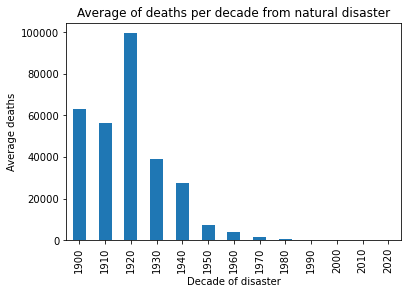

In [6]:
# calc mean deaths, per Decade and plot them in a bar plot
means = df.groupby(["Disaster_Decade"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'bar')
ax.set_ylabel('Average deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of deaths per decade from natural disaster')
means

When having a look at the average deaths per decade due to natural disaster, it can be seen that there was a peek in the 1920th and the number of deaths decreased over the years. However, this does not automatically mean that the number of natural disasters is decreasing. 

Disaster_Decade
1900    231.0
1910    500.0
1920    233.5
1930    200.0
1940    190.5
1950     88.0
1960     57.0
1970     35.0
1980     34.0
1990     22.0
2000     13.0
2010     13.0
2020      7.0
Name: Total_Deaths, dtype: Float64

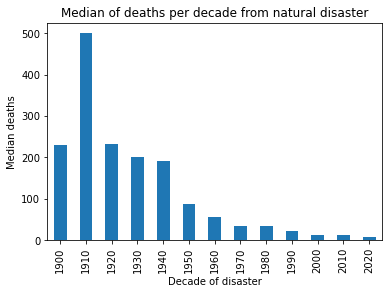

In [7]:
# calc median deaths, per Decade and plot them in a bar plot
medians = df.groupby(["Disaster_Decade"]).median()['Total_Deaths']
ax = medians.plot(kind = 'bar')
ax.set_ylabel('Median deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of deaths per decade from natural disaster')
medians

The median compared to the mean shows that there seem to have been some events in 1920 leading to a really high number of deaths. Still we can see, that the number of deaths have significantly decreased in the last 90 years.

Disaster_Decade
1900      79
1910      77
1920     106
1930     135
1940     170
1950     310
1960     593
1970     871
1980    1755
1990    2957
2000    4473
2010    3758
2020    1204
Name: Continent, dtype: int64

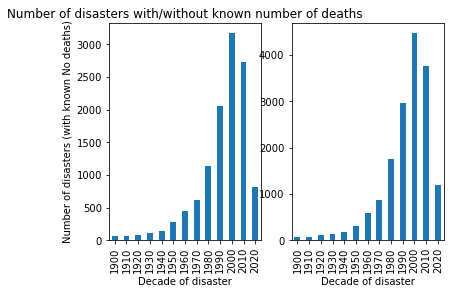

In [8]:
# calc count, per Decade and plot them in a bar plot
counts = df.groupby(["Disaster_Decade"]).count()['Total_Deaths']
plt.subplot(1, 2,1)
ax = counts.plot(kind = 'bar')
ax.set_ylabel('Number of disasters (with known No deaths)')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Number of disasters with/without known number of deaths')

counts = df.groupby(["Disaster_Decade"]).count()['Continent']
plt.subplot(1, 2, 2)
ax = counts.plot(kind = 'bar')
ax.set_xlabel ('Decade of disaster')

counts

Im letzten Jahrzehntist die Anzahl der Toten bzw. Katastrophen natürlich deutlich kleiner, da die Daten nur Informationen bis zum Jahr 2022 enthalten. Wobei das Jahr 2022 noch nicht vollständig abgebildet ist. Diesen Wert müsste man also, um ein korrektes Verhältnis zu erhalten mit etwa 3,5 multiplizieren.


In [9]:
print("Last Start_year of data : " +str(df["Start_Year"].max()))
print( "Hochgerechnete Number of natural disasters 2020-2029: " + str(1204*3.5))

Last Start_year of data : 2022
Hochgerechnete Number of natural disasters 2020-2029: 4214.0


Questions:
- Create a time series for the number of deaths for different levels of granularity (world, continent, countries of 
interest) 
- Check if there are any trends visible in those series and try to understand if those trends are driven by 
special circumstances (big tsunami, …) or if those trends are persistent 

Conclusions:
The number of deaths over the last century due to natural disaster has definitly decreased.
The number of natural disasters itself however has definitely increased.

Trends: Have a look, why the number of deaths in the 1920th is so high.